## *INSTITUTO POLITÉCNICO DE LEIRIA*
### Mestrado em Ciência de Dados - Projecto de Data Mining
#### Trabalho realizado por Tiago Ribeiro e Rute Santos
#### Manutenção Preditiva de uma Máquina Industrial - Parte 1


In [ ]:
# Importacão de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import data_table
data_table.enable_dataframe_formatter()
import seaborn as sns
sns.set(style='white')
from scipy import stats

In [ ]:
# Leitura ficheiro do conjunto de dados 'AI4I 2020 Predictive Maintenance Dataset'
data = pd.read_csv("/content/Proj2_ai4i2020.csv") 

In [ ]:
# Visualiza primeiras linhas do conjunto de dados
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [ ]:
# Renomeia nome das variáveis para melhor compreensão e para eliminar espacos
data.columns = ['udi', 'product_id', 'quality', 'air_temp', 'process_temp', 
              'rotational_speed', 'torque', 'tool_wear', 'machine_failed', 
              'tool_wear_failure', 'heat_dissipation_failure', 'power_failure', 
              'overstrain_failure', 'random_failure']

# Converte graus Kelvin para Celsius nas variáveis de Temperatura
data["air_temp"] = data["air_temp"].subtract(272,15)
data["process_temp"] = data["process_temp"].subtract(272,15)

In [ ]:
# Devolve informação sobre o DataFrame incluindo o tipo de índice e colunas, valores não-nulos e utilização de memória
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   udi                       10000 non-null  int64  
 1   product_id                10000 non-null  object 
 2   quality                   10000 non-null  object 
 3   air_temp                  10000 non-null  float64
 4   process_temp              10000 non-null  float64
 5   rotational_speed          10000 non-null  int64  
 6   torque                    10000 non-null  float64
 7   tool_wear                 10000 non-null  int64  
 8   machine_failed            10000 non-null  int64  
 9   tool_wear_failure         10000 non-null  int64  
 10  heat_dissipation_failure  10000 non-null  int64  
 11  power_failure             10000 non-null  int64  
 12  overstrain_failure        10000 non-null  int64  
 13  random_failure            10000 non-null  int64  
dtypes: floa

In [ ]:
# Conta dados omissos (NaN) do DataFrame
data.isnull().sum().sum()

0

In [ ]:
# product_id => Verifica se só há um registo por cada produto
len(data.product_id) == len(set(data.product_id))

True

In [ ]:
# Tabela de média, desvio padrão, minimo, máximo e percentis das variáveis numéricas
data_table.disable_dataframe_formatter()
data.describe(exclude=[object]).loc[['mean','std','min','25%','50%','75%','max']].T

,mean,std,min,25%,50%,75%,max
udi,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
air_temp,28.00493,2.000259,23.3,26.30,28.1,29.50,32.5
process_temp,38.00556,1.483734,33.7,36.80,38.1,39.10,41.8
rotational_speed,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
torque,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
tool_wear,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
machine_failed,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
tool_wear_failure,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
heat_dissipation_failure,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
power_failure,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Número e tipos de falhas
data.iloc[:, 8:14].sum()

machine_failed              339
tool_wear_failure            46
heat_dissipation_failure    115
power_failure                95
overstrain_failure           98
random_failure               19
dtype: int64

In [ ]:
# Verifica, para cada falha de máquina, quantos tipos de falhas existem

index_fail = list(np.where(data["machine_failed"] == 1)[0])
idx_0 = []; idx_1 = []; idx_2 = [];
for i in range(0, len(index_fail)):
  if(data.iloc[index_fail[i], 9:14].sum() > 1):
    idx_2.append(index_fail[i])
  elif(data.iloc[index_fail[i], 9:14].sum() == 0):
    idx_0.append(index_fail[i])
  else:
    idx_1.append(index_fail[i])

print("Ocorrências onde há um só tipo de falha:", len(idx_1),
      "\nOcorrências onde há mais de um tipo de falha:", len(idx_2), 
      "\nOcorrências onde há falha da máquina sem que seja especificado o tipo de falha:", len(idx_0))

Ocorrências onde há um só tipo de falha: 306 
Ocorrências onde há mais de um tipo de falha: 24 
Ocorrências onde há falha da máquina sem que seja especificado o tipo de falha: 9


In [ ]:
# Ocorrências sem que o tipo de falha esteja especificado
data.iloc[idx_0, :]

,udi,product_id,quality,air_temp,process_temp,rotational_speed,torque,tool_wear,machine_failed,tool_wear_failure,heat_dissipation_failure,power_failure,overstrain_failure,random_failure
1437,1438,H30851,H,26.8,37.9,1439,45.2,40,1,0,0,0,0,0
2749,2750,M17609,M,27.7,37.2,1685,28.9,179,1,0,0,0,0,0
4044,4045,M18904,M,29.9,38.9,1419,47.7,20,1,0,0,0,0,0
4684,4685,M19544,M,31.6,39.8,1421,44.8,101,1,0,0,0,0,0
5536,5537,M20396,M,30.3,39.8,1363,54.0,119,1,0,0,0,0,0
5941,5942,L53121,L,28.6,38.7,1438,48.5,78,1,0,0,0,0,0
6478,6479,L53658,L,28.5,37.8,1663,29.1,145,1,0,0,0,0,0
8506,8507,L55686,L,26.4,37.6,1710,27.3,163,1,0,0,0,0,0
9015,9016,L56195,L,25.2,36.1,1431,49.7,210,1,0,0,0,0,0


In [ ]:
# Ocorrências onde há mais de um tipo de falha
data.iloc[idx_2, :]

,udi,product_id,quality,air_temp,process_temp,rotational_speed,torque,tool_wear,machine_failed,tool_wear_failure,heat_dissipation_failure,power_failure,overstrain_failure,random_failure
69,70,L47249,L,26.9,37.0,1410,65.7,191,1,0,0,1,1,0
1324,1325,M16184,M,26.8,38.1,1243,74.5,194,1,0,0,1,1,0
1496,1497,L48676,L,26.0,36.7,1268,69.4,189,1,0,0,1,1,0
3611,3612,L50791,L,29.7,38.9,1405,46.4,207,1,1,0,0,0,1
3854,3855,L51034,L,30.4,39.0,1338,67.6,194,1,0,0,1,1,0
3943,3944,L51123,L,30.3,39.4,1333,66.7,205,1,0,0,1,1,0
4254,4255,L51434,L,30.6,39.0,1284,68.0,114,1,0,1,1,0,0
4342,4343,M19202,M,29.7,37.8,1284,68.2,111,1,0,1,1,0,0
4370,4371,L51550,L,30.0,37.9,1308,57.6,197,1,0,1,0,1,0
4383,4384,L51563,L,29.7,37.5,1298,65.5,229,1,0,1,0,1,0


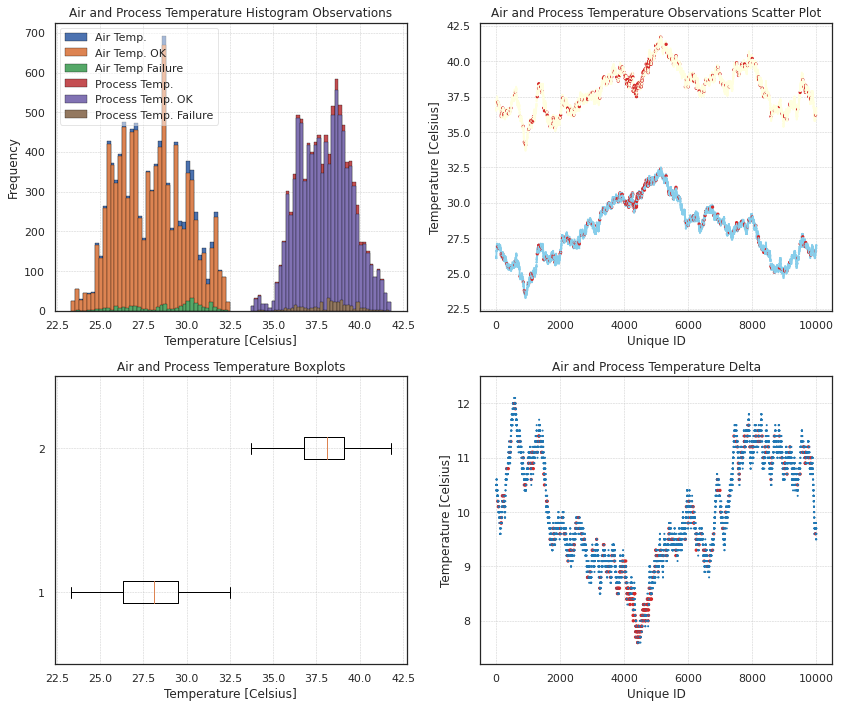

In [ ]:
# Análise das Variáveis de Temperatura: air_temp e process_temp

fig, ax = plt.subplots(2, 2, figsize=(12,10))

# Histograma
bins = 40
ax[0,0].set_title('Air and Process Temperature Histogram Observations')
ax[0,0].grid(linestyle = '--', linewidth = 0.5)
ax[0,0].set(xlabel='Temperature [Celsius]', ylabel='Frequency')
# Air
ax[0,0].hist(data.air_temp, bins, label = 'Air Temp.', edgecolor='black', linewidth=0.3)
ax[0,0].hist(data.air_temp[data["machine_failed"] == 0], bins , label = 'Air Temp. OK', edgecolor='black', linewidth=0.3)
ax[0,0].hist(data.air_temp[data["machine_failed"] == 1], bins, label = 'Air Temp Failure', edgecolor='black', linewidth=0.3)
# Process
ax[0,0].hist(data.process_temp, bins, label= 'Process Temp.', edgecolor='black', linewidth=0.3)
ax[0,0].hist(data.process_temp[data["machine_failed"] == 0], bins , label= 'Process Temp. OK', edgecolor='black', linewidth=0.3)
ax[0,0].hist(data.process_temp[data["machine_failed"] == 1], bins, label= 'Process Temp. Failure', edgecolor='black', linewidth=0.3)
# Legenda
ax[0,0].legend(framealpha = 0.5)

# Ponto vermelho quando máquina falha; ponto azul quando máquina não falha
col = np.where(data["machine_failed"] == 1,'tab:red','tab:blue')
size = np.where(data["machine_failed"] == 1, 5, 1)

# Gráfico de dispersão
ax[0,1].set_title('Air and Process Temperature Observations Scatter Plot')
ax[0,1].grid(linestyle = '--', linewidth = 0.5)
ax[0,1].scatter(data.udi , data.process_temp, c = np.where(data["machine_failed"] == 1,'tab:red','lightyellow'), s = size)
ax[0,1].scatter(data.udi , data.air_temp, c = np.where(data["machine_failed"] == 1,'tab:red','skyblue'), s = size)
ax[0,1].set(xlabel='Unique ID', ylabel='Temperature [Celsius]')

# Gráfico de dispersão
ax[1,1].set_title('Air and Process Temperature Delta')
ax[1,1].grid(linestyle = '--', linewidth = 0.5)
ax[1,1].scatter(data.udi, data.process_temp - data.air_temp, c=col, s = size)
ax[1,1].set(xlabel='Unique ID', ylabel='Temperature [Celsius]')
#ax[1,1].axhspan(7, 8.6, color='red', alpha=0.1, linestyle = '--')
ax[1,1].set_ylim(7.2, 12.5)

# Boxplot
ax[1,0].set_title('Air and Process Temperature Boxplots')
ax[1,0].grid(linestyle = '--', linewidth = 0.5)
ax[1,0].boxplot([data.air_temp, data.process_temp], vert = False)
ax[1,0].set(xlabel='Temperature [Celsius]')
#ax[1,0].set_xticks(['Air', 'Process'])

plt.tight_layout()

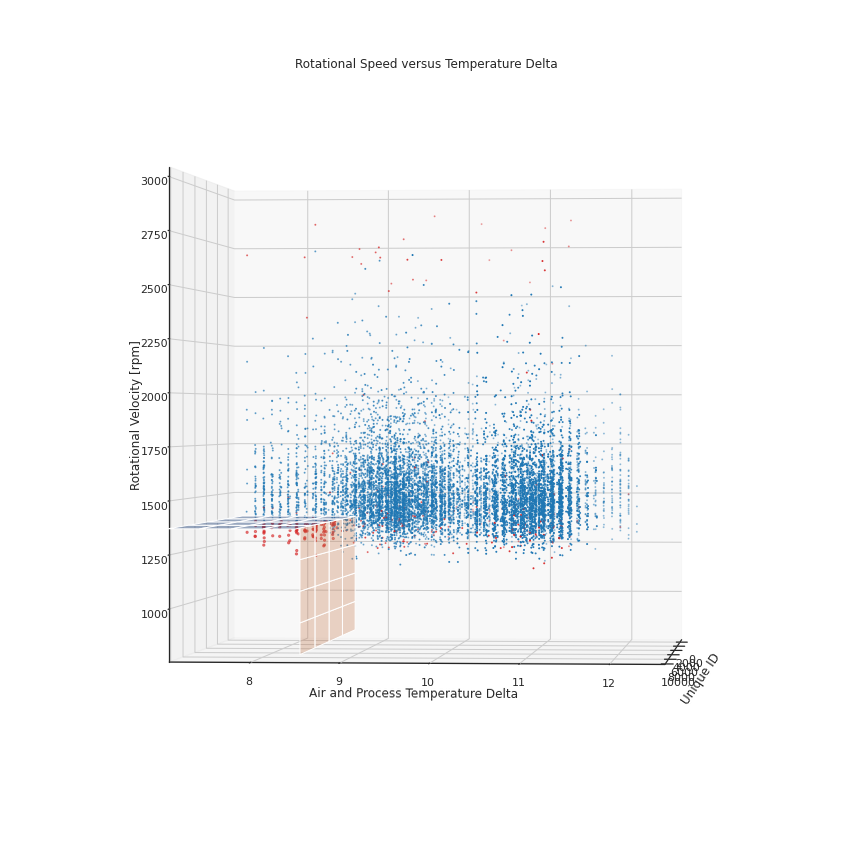

In [ ]:
# Gráfico de dispersão para análise de Falha de Dissipacão de Calor

fig = plt.figure( figsize=(12,12))
ax = fig.add_subplot(projection='3d')

# Ponto de dimensões superiores se estiverem dentro da área que provoca falha de Dissipacão de Calor
size = np.where((data["rotational_speed"] < 1380) & (data.process_temp - data.air_temp < 8.6), 5, 1)

# Gréfico de Dispersão 
ax.set_title('Rotational Speed versus Temperature Delta')
ax.scatter(data.udi, data.process_temp - data.air_temp, data.rotational_speed, c=col, s = size)

# Plano z = 1380 rpm
xx1, yy1 = np.meshgrid(np.linspace(-1000, 12000, 5), np.linspace(7.2, 8.6, 5))
z1 = np.ones((5, 5))*1380
ax.plot_surface(xx1, yy1, z1, alpha=0.5)

# Plano y = 8.6 C
xx, zz = np.meshgrid(np.linspace(-1000, 11000, 5), np.linspace(800, 1380, 5))
yy = np.ones((5, 5))*8.6
ax.plot_surface(xx, yy, zz, alpha=0.3)

# Limites eixos
ax.set_xlim(-1000, 10000)
ax.set_ylim(7.2, 12.5)
ax.set_zlim(800, 3000)

# Perspectiva gráfico
ax.azim = 5
ax.elev = 0

ax.set_xlabel('Unique ID')
ax.set_ylabel('Air and Process Temperature Delta')
ax.set_zlabel('Rotational Velocity [rpm]')

plt.tight_layout()

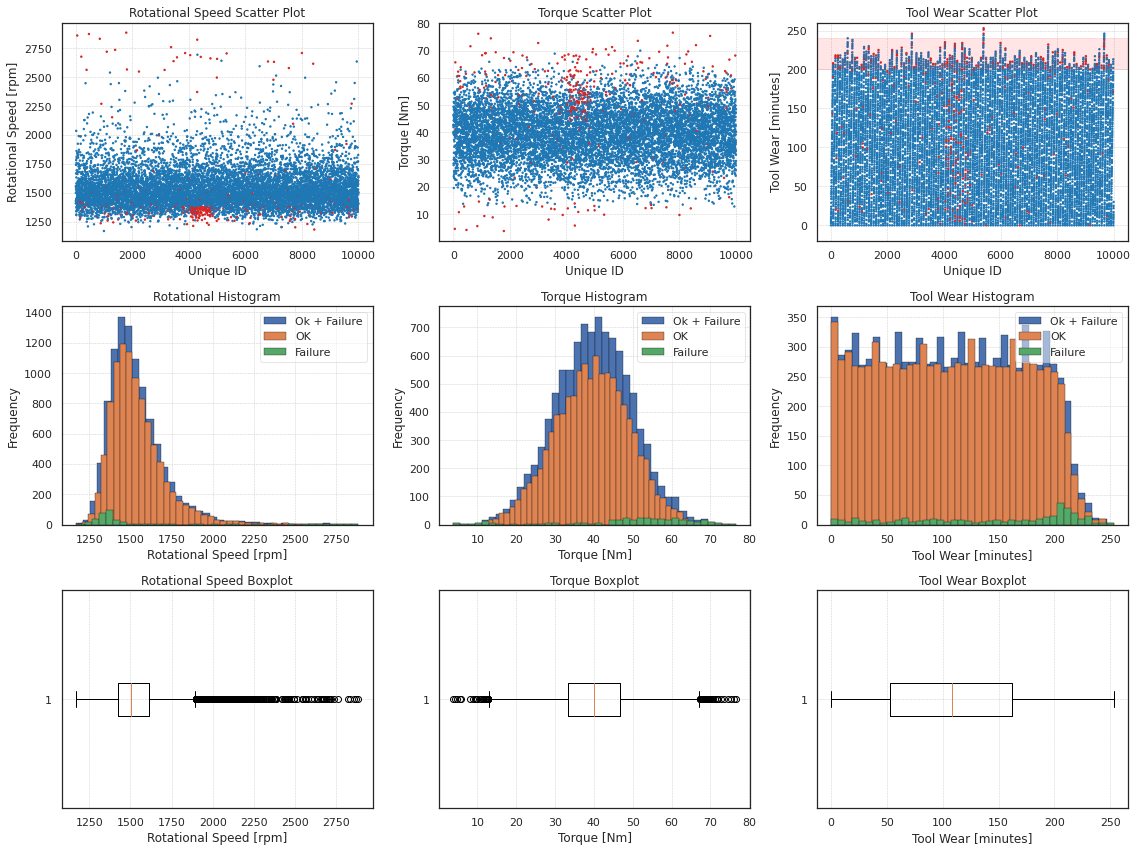

In [ ]:
# Análise Gráfica das Variáveis de 'Rotational Speed', 'Torque' e 'Tool Wear'

fig, ax = plt.subplots(3, 3, figsize=(16,12))

# Ponto vermelho quando máquina falha; ponto azul quando máquina não falha
col = np.where(data["machine_failed"] == 1,'tab:red','tab:blue')

# Gráficos 'Rotational Speed'
# Gráfico de dispersão
ax[0,0].set_title('Rotational Speed Scatter Plot')
ax[0,0].grid(linestyle = '--', linewidth = 0.5) 
ax[0,0].scatter(data.udi, data.rotational_speed, c=col, s = 2)
ax[0,0].set(xlabel='Unique ID',ylabel = 'Rotational Speed [rpm]')
# Histograma
bins = 40
ax[1,0].set_title('Rotational Histogram')
ax[1,0].grid(linestyle = '--', linewidth = 0.5)
ax[1,0].set(xlabel='Rotational Speed [rpm]', ylabel='Frequency')
ax[1,0].hist(data.rotational_speed, bins, label = 'Ok + Failure', edgecolor='black', linewidth = 0.3)
ax[1,0].hist(data.rotational_speed[data["machine_failed"] == 0], bins, label = 'OK', edgecolor='black', linewidth = 0.3)
ax[1,0].hist(data.rotational_speed[data["machine_failed"] == 1], bins, label = 'Failure', edgecolor='black', linewidth = 0.3)
ax[1,0].legend(framealpha = 0.5)
# Boxplot
ax[2,0].set_title('Rotational Speed Boxplot')
ax[2,0].grid(linestyle = '--', linewidth = 0.5)
ax[2,0].boxplot(data.rotational_speed, vert = False)
ax[2,0].set(xlabel='Rotational Speed [rpm]')

# Gráficos 'Torque'
# Gráfico de dispersão
ax[0,1].set_title('Torque Scatter Plot')
ax[0,1].grid(linestyle = '--', linewidth = 0.5) 
ax[0,1].scatter(data.udi, data.torque, c=col, s = 2)
ax[0,1].set(xlabel='Unique ID',ylabel='Torque [Nm]')
# Histograma
bins = 40
ax[1,1].set_title('Torque Histogram')
ax[1,1].grid(linestyle = '--', linewidth = 0.5)
ax[1,1].set(xlabel='Torque [Nm]', ylabel='Frequency')
ax[1,1].hist(data.torque, bins, label = 'Ok + Failure', edgecolor='black', linewidth=0.3)
ax[1,1].hist(data.torque[data["machine_failed"] == 0], bins, label = 'OK', edgecolor='black', linewidth = 0.3)
ax[1,1].hist(data.torque[data["machine_failed"] == 1], bins, label = 'Failure', edgecolor='black', linewidth = 0.3)
ax[1,1].legend(framealpha = 0.5)
# Boxplot
ax[2,1].set_title('Torque Boxplot')
ax[2,1].grid(linestyle = '--', linewidth = 0.5)
ax[2,1].boxplot(data.torque, vert = False)
ax[2,1].set(xlabel='Torque [Nm]')

# Gráficos 'Tool Wear'
# Gráfico de dispersão
ax[0,2].set_title('Tool Wear Scatter Plot')
ax[0,2].grid(linestyle = '--', linewidth = 0.5) 
ax[0,2].scatter(data.udi, data.tool_wear, c=col, s = 2)
ax[0,2].set(xlabel='Unique ID',ylabel='Tool Wear [minutes]')
# 'Tool Wear Failure' de forma aleatória quando tem desgaste está entre 200 e 240 minutos
ax[0,2].axhspan(200, 240, color='red', alpha=0.1)
ax[0,2].set_ylim(-20, 260)

# Histograma
bins = 40
ax[1,2].set_title('Tool Wear Histogram')
ax[1,2].grid(linestyle = '--', linewidth = 0.5)
ax[1,2].set(xlabel='Tool Wear [minutes]', ylabel='Frequency')
ax[1,2].hist(data.tool_wear, bins, label = 'Ok + Failure', edgecolor='black', linewidth=0.3)
ax[1,2].hist(data.tool_wear[data["machine_failed"] == 0], bins, label = 'OK', edgecolor='black', linewidth = 0.3)
ax[1,2].hist(data.tool_wear[data["machine_failed"] == 1], bins, label = 'Failure', edgecolor='black', linewidth = 0.3)
ax[1,2].legend(framealpha = 0.5)
# Boxplot
ax[2,2].set_title('Tool Wear Boxplot')
ax[2,2].grid(linestyle = '--', linewidth = 0.5)
ax[2,2].boxplot(data.tool_wear, vert = False)
ax[2,2].set(xlabel='Tool Wear [minutes]')

plt.tight_layout()

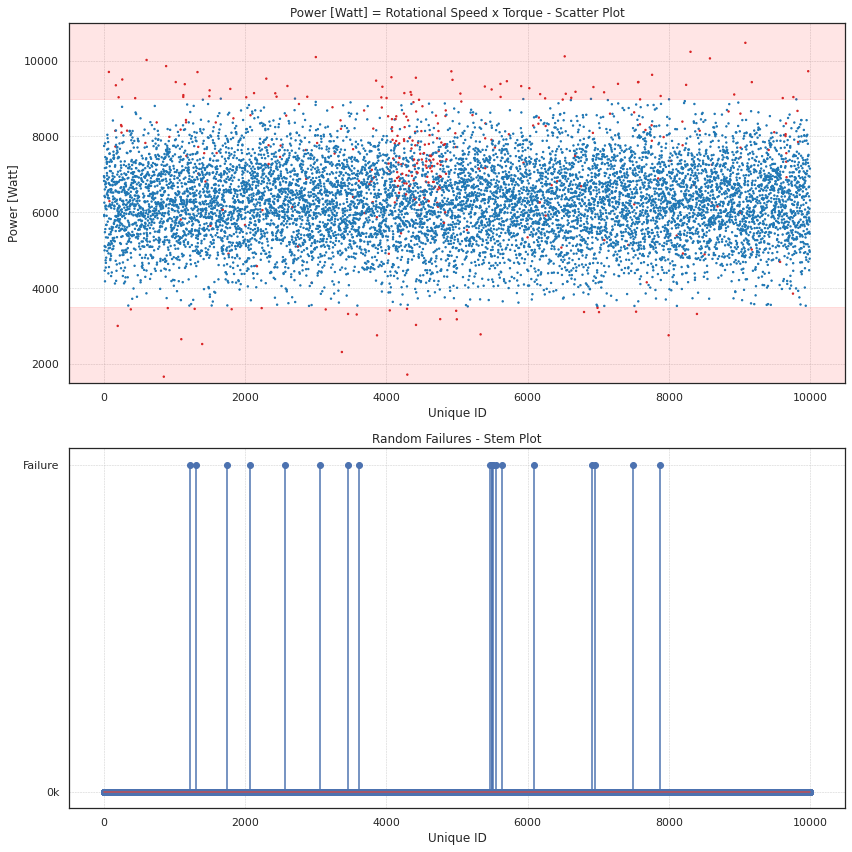

In [ ]:
# Análise Gráfica de Falhas 

fig, ax = plt.subplots(2, 1, figsize=(12,12))

# Ponto vermelho quando máquina falha; ponto azul quando máquina não falha
col = np.where(data["machine_failed"] == 1,'tab:red','tab:blue')

# 'Power Failure' se  3500 < Potencia [Watt] < 9000 ('Rotational Speed' e 'Torque')

# Gráfico de dispersão
ax[0].set_title('Power [Watt] = Rotational Speed x Torque - Scatter Plot')
ax[0].grid(linestyle = '--', linewidth = 0.5)
# Potencia [Watt] = Binário [Nm] x Velocidade Angular [rad/s] <=> Potencia [Watt] = Binário [Nm] x (Velocidade Rotacional [rpm] x 2π/60)
ax[0].scatter(data.udi, data.rotational_speed * (2*np.pi/60) * data.torque, c = col, s = 2)
ax[0].set(xlabel='Unique ID', ylabel = 'Power [Watt]')

# Áreas de falha
ax[0].axhspan(1500, 3500, color='red', alpha=0.1)
ax[0].axhspan(9000, 11000, color='red', alpha=0.1)
ax[0].set_ylim(1500, 11000)

# 'Random Failure' - Gráfico Stem 
ax[1].set_title('Random Failures - Stem Plot')
ax[1].grid(linestyle = '--', linewidth = 0.5)
ax[1].stem(data.udi, data.random_failure, use_line_collection = True)
ax[1].set(xlabel='Unique ID')
ax[1].set_yticks([0,1])
ax[1].set_yticklabels(['0k', 'Failure'])

plt.tight_layout()

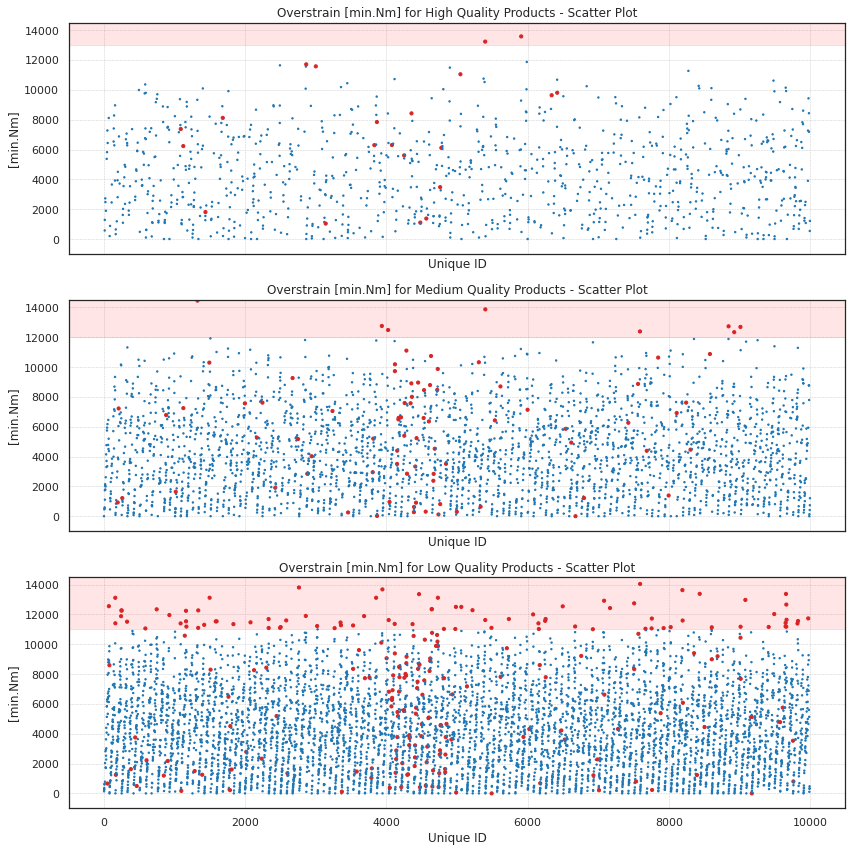

In [ ]:
# Análise Gráfica de Falhas (continuacão)

fig, ax = plt.subplots(3, 1, figsize=(12,12), sharex=True)

# Ponto vermelho quando máquina falha; ponto azul quando máquina não falha
col = np.where(data["machine_failed"] == 1,'tab:red','tab:blue')
size = np.where(data["machine_failed"] == 1, 10, 2)

# 'Overstrain Failure'

# Para Produtos de qualidade 'High'   : há falha quando tool_wear x torque > 13000 min.Nm
# Para Produtos de qualidade 'Medium' : há falha quando tool_wear x torque > 12000 min.Nm
# Para Produtos de qualidade 'Low'    : há falha quando tool_wear x torque > 11000 min.Nm

# Gráfico de dispersão
# Qualidade "H"
ax[0].set_title('Overstrain [min.Nm] for High Quality Products - Scatter Plot')
ax[0].grid(linestyle = '--', linewidth = 0.5)

# Cria dados de Overstrain para as diferentes quakidades de produto
data_overstrain_H = data.tool_wear[data["quality"] == "H"] * data.torque[data["quality"] == "H"]
data_overstrain_M = data.tool_wear[data["quality"] == "M"] * data.torque[data["quality"] == "M"]
data_overstrain_L = data.tool_wear[data["quality"] == "L"] * data.torque[data["quality"] == "L"]

# Potencia [Watt] = Binário [Nm] x Velocidade Angular [rad/s] <=> Potencia [Watt] = Binário [Nm] x (Velocidade Rotacional [rpm] x 2π/60)
ax[0].scatter(data.udi[data["quality"] == "H"], data_overstrain_H , 
              c = col[data["quality"] == "H"],
              s = size[data["quality"] == "H"])

ax[0].set(xlabel='Unique ID', ylabel = '[min.Nm]')
ax[0].axhspan(13000, 15000, color='red', alpha=0.1)
ax[0].set_ylim(-1000, 14500)

# Qualidade "M"
ax[1].set_title('Overstrain [min.Nm] for Medium Quality Products - Scatter Plot')
ax[1].grid(linestyle = '--', linewidth = 0.5)
# Potencia [Watt] = Binário [Nm] x Velocidade Angular [rad/s] <=> Potencia [Watt] = Binário [Nm] x (Velocidade Rotacional [rpm] x 2π/60)
ax[1].scatter(data.udi[data["quality"] == "M"], data_overstrain_M , 
              c = col[data["quality"] == "M"],
              s = size[data["quality"] == "M"])

ax[1].set(xlabel='Unique ID', ylabel = '[min.Nm]')
ax[1].axhspan(12000, 15000, color='red', alpha=0.1)
ax[1].set_ylim(-1000, 14500)

# Qualidade "L"
ax[2].set_title('Overstrain [min.Nm] for Low Quality Products - Scatter Plot')
ax[2].grid(linestyle = '--', linewidth = 0.5)
# Potencia [Watt] = Binário [Nm] x Velocidade Angular [rad/s] <=> Potencia [Watt] = Binário [Nm] x (Velocidade Rotacional [rpm] x 2π/60)
ax[2].scatter(data.udi[data["quality"] == "L"], data_overstrain_L , 
              c = col[data["quality"] == "L"],
              s = size[data["quality"] == "L"])

ax[2].set(xlabel='Unique ID', ylabel = '[min.Nm]')
ax[2].axhspan(11000, 15000, color='red', alpha=0.1)
ax[2].set_ylim(-1000, 14500)

plt.tight_layout()

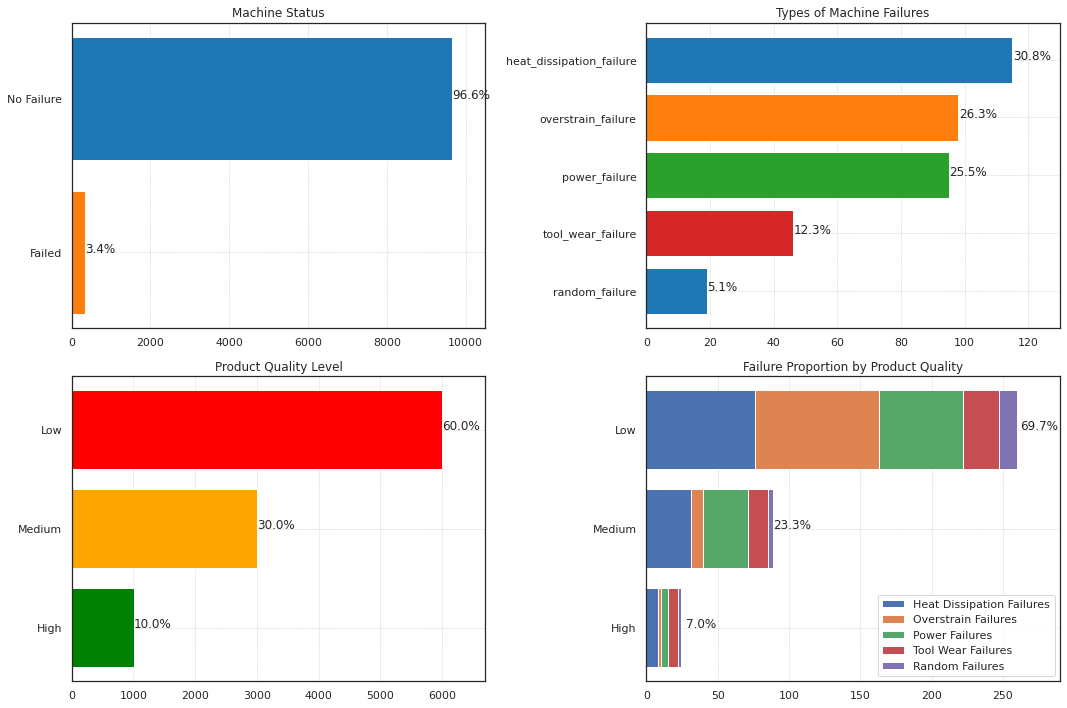

In [ ]:
# Análise Gráfica de Variáveis Categóricas

fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax[0,0].set_title('Machine Status')
graph1 = ax[0,0].barh(["No Failure","Failed"], data["machine_failed"].value_counts(), color=['tab:blue', 'tab:orange'])
ax[0,0].grid(linestyle = '--', linewidth = 0.5)

# Escreve percentagem no gráfico de barras
percentage = []
for i in range(0, 2):
  percentage.append((sum(data["machine_failed"] == i)/len(data.machine_failed))*100)

elem = 0
for i in graph1:
   width = i.get_width()
   ax[0,0].text(x = width + .20, y = i.get_y() + i.get_height() / 2, s = str(round(percentage[elem],1))+'%')
   elem += 1

ax[0,0].invert_yaxis()
ax[0,0].set_xlim(0, 10500)

# Seleciona dados para quando máquina tem falha
ax[0,1].set_title('Types of Machine Failures')

failure_categories = ['heat_dissipation_failure','overstrain_failure', 'power_failure',
                      'tool_wear_failure', 'random_failure']
failure_values = data.loc[:, failure_categories].sum()

graph2 = ax[0,1].barh(failure_categories, failure_values, color=['tab:blue', 'tab:orange','tab:green','tab:red'])
ax[0,1].invert_yaxis()

# Escreve percentagem no gráfico de barras
percentage = []
for i in range(failure_values.shape[0]):
  percentage.append((failure_values[i]/failure_values.sum())*100)
elem = 0
for i in graph2:
    width = i.get_width()
    ax[0,1].text(x = width + .20, y = i.get_y() + i.get_height() / 2, s = str(round(percentage[elem],1))+'%')
    elem += 1

ax[0,1].grid(linestyle = '--', linewidth = 0.5)
ax[0,1].set_xlim(0, 130)
ax[1,0].set_title('Product Quality Level')
graph3 = ax[1,0].barh(["Low", "Medium", "High"], data['quality'].value_counts(), color=['red', 'orange', 'green'])
ax[1,0].grid(linestyle = '--', linewidth = 0.5)
ax[1,0].invert_yaxis()
ax[1,0].set_xlim(0, 6700)

# Escreve percentagem no gráfico de barras
percentage = []
for i in range(data['quality'].value_counts().shape[0]):
  percentage.append((data['quality'].value_counts()[i]/data['quality'].value_counts().sum())*100)
elem = 0
for i in graph3:
  width = i.get_width()
  ax[1,0].text(x = width + .20, y = i.get_y() + i.get_height() / 2, s = str(round(percentage[elem],1))+'%')
  elem += 1

# Gráfico de barras empilhadas
ax[1,1].set_title('Failure Proportion by Product Quality')
ax[1,1].grid(linestyle = '--', linewidth = 0.5)

labels = ["Low", "Medium", "High"]
# Queries para tipos de falha por categoria de qualidade
tt_fail_qy = data.query('machine_failed == 1')['quality'].value_counts()
ht_fail_qy = data.query('machine_failed == 1' and 'heat_dissipation_failure == 1')['quality'].value_counts()
ov_fail_qy = data.query('machine_failed == 1' and 'overstrain_failure == 1')['quality'].value_counts()
pw_fail_qy = data.query('machine_failed == 1' and 'power_failure == 1')['quality'].value_counts()
tl_fail_qy = data.query('machine_failed == 1' and 'tool_wear_failure == 1')['quality'].value_counts()
rd_fail_qy = data.query('random_failure == 1')['quality'].value_counts()
tt_fail_qy = (ht_fail_qy + ov_fail_qy + pw_fail_qy + tl_fail_qy + rd_fail_qy).sort_values(ascending=False)

#graph4 = ax[1,1].barh(labels,data.query('machine_failed == 1')['quality'].value_counts(), label = "Total Failures")
ax[1,1].barh(labels, ht_fail_qy, label = "Heat Dissipation Failures")
ax[1,1].barh(labels, ov_fail_qy, left = ht_fail_qy, label = "Overstrain Failures")
ax[1,1].barh(labels, pw_fail_qy, left = ht_fail_qy + ov_fail_qy, label = "Power Failures")
ax[1,1].barh(labels, tl_fail_qy, left = ht_fail_qy + ov_fail_qy + pw_fail_qy, label = "Tool Wear Failures")
ax[1,1].barh(labels, rd_fail_qy, left = ht_fail_qy + ov_fail_qy + pw_fail_qy + tl_fail_qy, label = "Random Failures")
ax[1,1].invert_yaxis()
ax[1,1].set_xlim(0, 290)
ax[1,1].legend()

# Escreve percentagem no gráfico de barras
percentage = []
for i in range(data['quality'].value_counts().shape[0]):
  percentage.append((tt_fail_qy[i]/tt_fail_qy.sum())*100)
elem = 0
for i in range(data['quality'].value_counts().shape[0]):
  ax[1,1].text(x = tt_fail_qy[i] + 2, y = i, s = str(round(percentage[elem],1))+'%')
  elem += 1

plt.tight_layout()

In [ ]:
# Funcões para gráfico de correlacões
# (Código adaptado de: https://stackoverflow.com/questions/48139899/correlation-matrix-plot-with-coefficients-on-one-side-scatterplots-on-another)

def corrfunc(x, y, **kws):
  r, p = stats.pearsonr(x, y)
  p_stars = ''
  if p <= 0.05:
    p_stars = '*'
  if p <= 0.01:
    p_stars = '**'
  if p <= 0.001:
    p_stars = '***'
  ax = plt.gca()
  ax.annotate('r = {:.2f} '.format(r) + p_stars, xy=(0.05, 0.9), xycoords=ax.transAxes)

def annotate_colname(x, **kws):
  ax = plt.gca()
  ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes,fontweight='bold')

def cor_matrix(df):
  g = sns.PairGrid(df, palette=['red'])
  # Use normal regplot as `lowess=True` doesn't provide CIs.
  g.map_upper(sns.regplot, scatter_kws={'s':10})
  g.map_diag(sns.distplot)
  g.map_diag(annotate_colname)
  g.map_lower(sns.kdeplot, cmap='Blues_d')
  g.map_lower(corrfunc)
  # Remove axis labels, as they're in the diagonals.
  for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
  return g

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

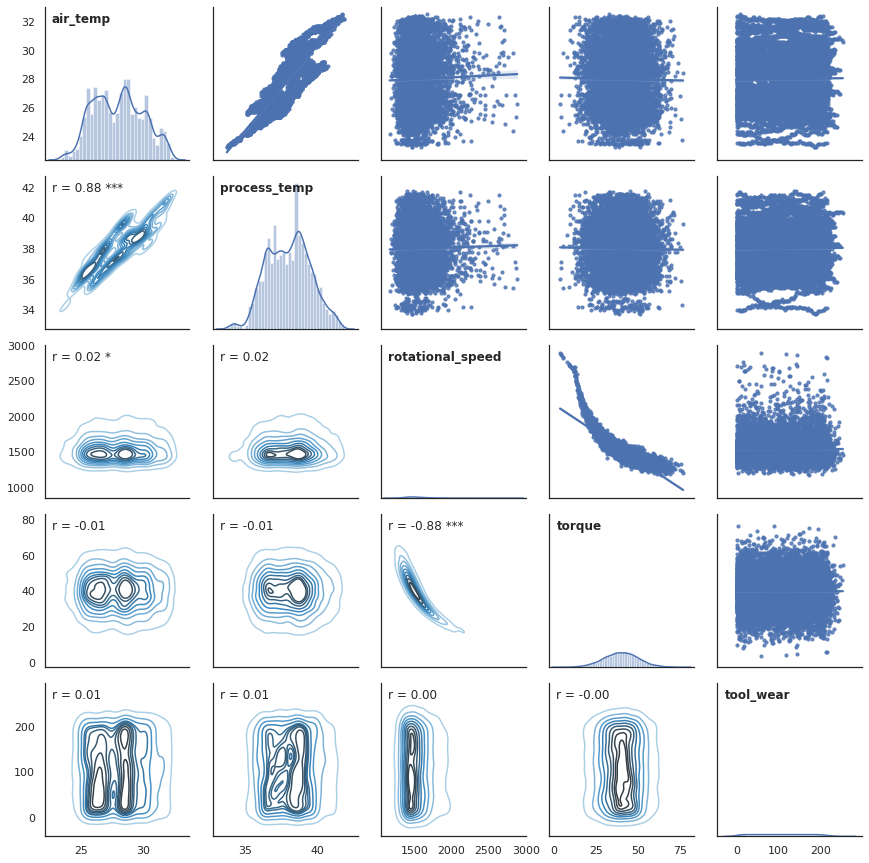

In [ ]:
cor_matrix(data[['air_temp','process_temp','rotational_speed','torque','tool_wear']])